In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Link to the data source

In [ ]:
# Import pandas and read in the GDrive-mounted CSV
   
import pandas as pd
import math 
from scipy import stats
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set()
  
df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/Purchase_Loan.csv')
df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Chexk on column names and datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_ANNUITY                  815566 non-null   float64
 4   AMT_APPLICATION              1048575 non-null  float64
 5   AMT_CREDIT                   1048575 non-null  float64
 6   AMT_DOWN_PAYMENT             489179 non-null   float64
 7   AMT_GOODS_PRICE              807610 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 9   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 12  RATE_DOWN_PAYMENT            489179 non-nu

In [ ]:
# Check on the average, std, min ,max,...
df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.048575e+06,1.048575e+06,815566.000000,1.048575e+06,1.048575e+06,4.891790e+05,8.076100e+05,1.048575e+06,1.048575e+06,489179.000000,3721.000000,3721.000000,1.048575e+06,1.048575e+06,815569.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000
mean,1.922775e+06,2.784367e+05,15891.265151,1.742698e+05,1.950000e+05,6.700778e+03,2.262892e+05,1.248486e+01,9.964123e-01,0.079619,0.187177,0.774922,8.820381e+02,3.183904e+02,15.995639,342387.346201,13833.802031,33614.930898,76591.061435,81985.701661,0.331530
std,5.329366e+05,1.028569e+05,14745.557438,2.910789e+05,3.169407e+05,2.078570e+04,3.134490e+05,3.333140e+00,5.979011e-02,0.107882,0.083343,0.099514,7.792649e+02,7.996734e+03,14.508109,88595.441587,72460.126454,106643.960780,149653.053854,153298.887247,0.470764
min,1.000001e+06,1.000010e+05,0.000000,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000014,0.034781,0.373150,2.000000e+00,-1.000000e+00,0.000000,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.460642e+06,1.893860e+05,6301.350000,1.890000e+04,2.427750e+04,0.000000e+00,5.058000e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,2.810000e+02,-1.000000e+00,6.000000,365243.000000,-1626.000000,-1241.000000,-1313.000000,-1269.000000,0.000000
50%,1.923419e+06,2.788100e+05,11250.000000,7.081650e+04,8.025300e+04,1.624500e+03,1.115116e+05,1.200000e+01,1.000000e+00,0.051062,0.189122,0.835095,5.830000e+02,4.000000e+00,12.000000,365243.000000,-830.000000,-361.000000,-537.000000,-498.000000,0.000000
75%,2.384448e+06,3.677445e+05,20523.003750,1.800000e+05,2.152395e+05,7.749000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,1.303000e+03,8.500000e+01,24.000000,365243.000000,-410.000000,128.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,418058.145000,6.905160e+06,6.905160e+06,2.150100e+06,6.905160e+06,2.300000e+01,1.000000e+00,0.989740,1.000000,1.000000,2.922000e+03,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [ ]:
#Check null values
df_null = df.isnull()
df_null
#Got no null value

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
1048571,False,False,False,True,False,False,True,True,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True
1048572,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Wrangling Data

In [ ]:
#Checking reasons people loan for categories.
''' We will only be interested in "Everyday expenses" and "Medicine" groups
since they have similar amount of observations. '''

df["NAME_CASH_LOAN_PURPOSE"].value_counts()

XAP                                 582714
XNA                                 422517
Repairs                              14767
Other                                 9664
Urgent needs                          5309
Buying a used car                     1784
Building a house or an annex          1682
Everyday expenses                     1487
Medicine                              1402
Payments on other loans               1210
Education                              975
Journey                                745
Purchase of electronic equipment       644
Buying a new car                       637
Wedding / gift / holiday               594
Buying a home                          546
Car repairs                            493
Furniture                              475
Buying a holiday home / land           334
Business development                   254
Gasification / water supply            203
Buying a garage                         84
Hobby                                   31
Money for a

In [ ]:
# Create new DataFrame with only "Everyday expenses" purpose category.
df_everyday = df.iloc[(df["NAME_CASH_LOAN_PURPOSE"]=='Everyday expenses').values]
df_everyday.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.487000e+03,1487.000000,1479.000000,1.487000e+03,1.487000e+03,550.0,1.487000e+03,1487.000000,1487.000000,550.0,0.0,0.0,1487.000000,1487.000000,1479.000000,670.0,670.000000,670.000000,670.000000,670.000000,670.000000
mean,1.926526e+06,279887.468056,17619.360304,1.953460e+05,2.191671e+05,0.0,1.953460e+05,12.381305,0.997983,0.0,NaN,NaN,1137.589778,8.894418,18.454361,365243.0,-1175.105970,-733.523881,34552.385075,35650.428358,0.656716
std,5.333711e+05,104545.885264,12340.075571,2.509545e+05,2.794879e+05,0.0,2.509545e+05,3.248853,0.044886,0.0,NaN,NaN,753.657538,107.341433,12.194374,0.0,729.692903,813.508684,108475.790785,109948.136275,0.475160
min,1.000908e+06,100042.000000,2356.200000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,2.000000,0.000000,0.0,NaN,NaN,7.000000,-1.000000,6.000000,365243.0,-2417.000000,-2249.000000,-2249.000000,-2243.000000,0.000000
25%,1.470042e+06,192684.500000,9916.965000,6.750000e+04,8.261100e+04,0.0,6.750000e+04,10.000000,1.000000,0.0,NaN,NaN,504.000000,-1.000000,12.000000,365243.0,-1960.750000,-1573.250000,-1612.500000,-1603.750000,0.000000
50%,1.937838e+06,285839.000000,14455.395000,1.350000e+05,1.483650e+05,0.0,1.350000e+05,12.000000,1.000000,0.0,NaN,NaN,757.000000,-1.000000,12.000000,365243.0,-781.000000,-480.000000,-590.500000,-581.000000,1.000000
75%,2.395964e+06,372981.000000,21389.895000,2.250000e+05,2.398500e+05,0.0,2.250000e+05,15.000000,1.000000,0.0,NaN,NaN,1933.500000,0.000000,24.000000,365243.0,-558.250000,-102.000000,-279.250000,-273.500000,1.000000
max,2.844592e+06,456157.000000,129176.190000,3.150000e+06,4.104351e+06,0.0,3.150000e+06,22.000000,1.000000,0.0,NaN,NaN,2450.000000,3800.000000,60.000000,365243.0,-31.000000,1230.000000,365243.000000,365243.000000,1.000000


In [ ]:
# Create new DataFrame with only "Medicine" purpose category.
df_med = df.iloc[(df["NAME_CASH_LOAN_PURPOSE"]=='Medicine').values]
df_med.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.402000e+03,1402.000000,1396.000000,1.402000e+03,1.402000e+03,305.0,1.402000e+03,1402.000000,1402.0,305.0,0.0,0.0,1402.000000,1402.000000,1396.000000,639.0,639.000000,639.000000,639.000000,639.000000,639.000000
mean,1.939881e+06,276974.005706,18829.855605,2.343192e+05,2.667341e+05,0.0,2.343192e+05,11.948645,1.0,0.0,NaN,NaN,861.646933,8.784593,22.478510,365243.0,-949.937402,-426.134585,56517.674491,57666.555556,0.705790
std,5.246837e+05,105122.689511,12266.317635,2.327146e+05,2.597756e+05,0.0,2.327146e+05,3.079752,0.0,0.0,NaN,NaN,670.278236,97.951549,13.646441,0.0,656.424491,759.780781,133082.745261,134155.910734,0.456044
min,1.005983e+06,100124.000000,3618.180000,0.000000e+00,0.000000e+00,0.0,0.000000e+00,3.000000,1.0,0.0,NaN,NaN,2.000000,-1.000000,6.000000,365243.0,-2405.000000,-2255.000000,-2255.000000,-2249.000000,0.000000
25%,1.494177e+06,184042.000000,10618.875000,9.000000e+04,1.083128e+05,0.0,9.000000e+04,10.000000,1.0,0.0,NaN,NaN,371.000000,-1.000000,12.000000,365243.0,-1577.500000,-1099.000000,-1180.500000,-1175.500000,0.000000
50%,1.953106e+06,276124.000000,16075.080000,1.575000e+05,1.829565e+05,0.0,1.575000e+05,12.000000,1.0,0.0,NaN,NaN,600.000000,-1.000000,18.000000,365243.0,-662.000000,-235.000000,-408.000000,-400.000000,1.000000
75%,2.377824e+06,373456.000000,22894.323750,2.700000e+05,3.375000e+05,0.0,2.700000e+05,14.000000,1.0,0.0,NaN,NaN,1475.000000,0.000000,30.000000,365243.0,-473.500000,113.500000,-152.000000,-145.000000,1.000000
max,2.841320e+06,456228.000000,131762.160000,2.250000e+06,2.410380e+06,0.0,2.250000e+06,22.000000,1.0,0.0,NaN,NaN,2455.000000,3575.000000,60.000000,365243.0,-67.000000,1307.000000,365243.000000,365243.000000,1.000000


In [ ]:
''' Concatenate "Everyday expenses" and "Medicine" dataframe to make a new 
 dataframe only contain these 2 types to make better visualization. '''
 
df_em =pd.concat([df_med,df_everyday])
df_em

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
500,2397349,234094,Cash loans,14269.860,67500.0,69727.5,NaN,67500.0,FRIDAY,16,Y,1,NaN,NaN,NaN,Medicine,Approved,797,Cash through the bank,XAP,Unaccompanied,New,XNA,Cash,walk-in,Country-wide,20,Connectivity,6.0,high,Cash Street: high,365243.0,-767.0,-617.0,-617.0,-613.0,1.0
1062,2774574,306636,Cash loans,25932.915,450000.0,533160.0,NaN,450000.0,SATURDAY,6,Y,1,NaN,NaN,NaN,Medicine,Refused,730,Cash through the bank,LIMIT,Family,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,48.0,middle,Cash Street: middle,NaN,NaN,NaN,NaN,NaN,NaN
2995,2043447,416369,Cash loans,24750.000,900000.0,900000.0,NaN,900000.0,SATURDAY,10,Y,1,NaN,NaN,NaN,Medicine,Refused,293,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),10,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
3112,2011935,313474,Cash loans,10428.345,121500.0,121500.0,0.0,121500.0,WEDNESDAY,10,Y,1,0.0,NaN,NaN,Medicine,Approved,2165,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,18.0,high,Cash Street: high,365243.0,-2134.0,-1624.0,-1774.0,-1769.0,0.0
4037,2544070,198376,Cash loans,10080.000,90000.0,90000.0,0.0,90000.0,SATURDAY,13,Y,1,0.0,NaN,NaN,Medicine,Refused,2151,Cash through the bank,HC,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,0,XNA,12.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045708,1037371,235389,Cash loans,10849.860,90000.0,95940.0,0.0,90000.0,MONDAY,11,Y,1,0.0,NaN,NaN,Everyday expenses,Approved,1992,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,walk-in,Credit and cash offices,0,XNA,12.0,high,Cash Street: high,365243.0,-1961.0,-1631.0,-1661.0,-1657.0,0.0
1047179,1867942,441269,Cash loans,32272.605,675000.0,767664.0,NaN,675000.0,TUESDAY,9,Y,1,NaN,NaN,NaN,Everyday expenses,Refused,821,XNA,LIMIT,Unaccompanied,Repeater,XNA,Cash,walk-in,Contact center,-1,XNA,48.0,middle,Cash Street: middle,NaN,NaN,NaN,NaN,NaN,NaN
1048193,1391165,419544,Cash loans,5693.085,45000.0,47970.0,NaN,45000.0,WEDNESDAY,14,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,531,Cash through the bank,XAP,NaN,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,12.0,high,Cash Street: high,365243.0,-501.0,-171.0,-231.0,-226.0,1.0
1048197,1215479,322562,Cash loans,12375.000,450000.0,450000.0,NaN,450000.0,MONDAY,18,Y,1,NaN,NaN,NaN,Everyday expenses,Canceled,152,Cash through the bank,XAP,Unaccompanied,Refreshed,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,60.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN


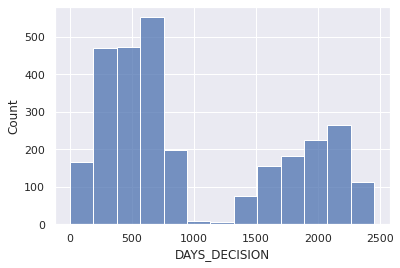

In [ ]:
# Check the distribution of how many days it takes to make a loan decision.
# non normal distribution can be tested with t-test with high observations.
sns.histplot(df_em["DAYS_DECISION"]) 

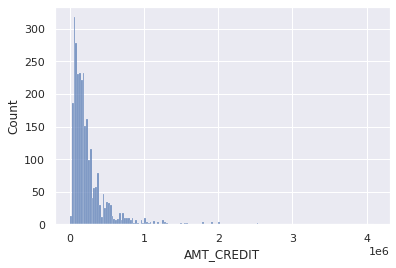

In [ ]:
# Check the distribution of credit limit.
# non normal distribution can be tested with t-test with high observations.
sns.histplot(df_em["AMT_CREDIT"]) 

In [ ]:
# Create a crosstab of loan purposes that being filtered and amount credit.
pd.crosstab(df["AMT_CREDIT"],df_em["NAME_CASH_LOAN_PURPOSE"])

NAME_CASH_LOAN_PURPOSE,Everyday expenses,Medicine
AMT_CREDIT,,
0.0,7,5
45000.0,28,13
46485.0,41,24
47970.0,50,31
49455.0,4,9
...,...,...
2410380.0,0,1
2517300.0,2,0
2700000.0,1,0


In [ ]:
# Create a crosstab of loan purposes that being filtered and day decisions.
pd.crosstab(df["DAYS_DECISION"],df_em["NAME_CASH_LOAN_PURPOSE"])

NAME_CASH_LOAN_PURPOSE,Everyday expenses,Medicine
DAYS_DECISION,,
2,0,1
4,0,1
7,1,0
8,0,1
10,0,1
...,...,...
2430,1,0
2435,0,1
2447,1,0


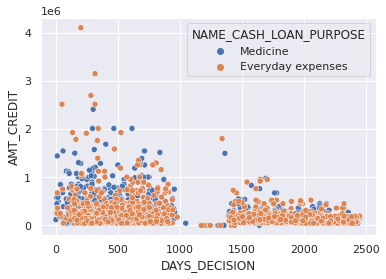

In [ ]:
''' Through this scatterplot map, we can see that "medicine" loan is more 
likely to give higher credits and shorter decision days than "everyday expenses" loan.'''

sns.scatterplot(x='DAYS_DECISION', y='AMT_CREDIT', hue='NAME_CASH_LOAN_PURPOSE', data=df_em)

Now we are going to test the hypotheses to see if this insight is right.

# Explore data

## Statistical Test 
### Hypothesis 1: 

- Null hypothesis Ho: There is no statistically significant difference in average amount of credits between people who have `everyday expenses` loans and people who have `medicine` loans.

- Alternative hypothesis Ha: There is a statistically significant difference in average amount of credits between people who have `everyday expenses` loans and people who have `medicine` loans.




In [ ]:
''' perform t-test on the amount of credits between customers who 
have loan of "everyday spending" and "medicine" loan '''

stats.ttest_ind(df_med['AMT_CREDIT'], df_everyday['AMT_CREDIT'])

Ttest_indResult(statistic=4.73079283268792, pvalue=2.3439487896256384e-06)

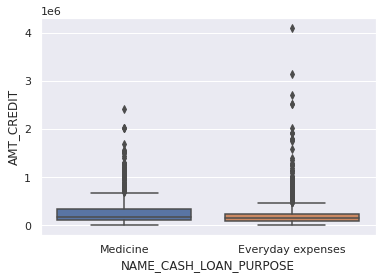

In [ ]:
''' Make a boxplot to visualize the amount of credits and filtered 
loan purposes difference (t-test) '''

sns.boxplot(y = df_em["AMT_CREDIT"],x=df_em["NAME_CASH_LOAN_PURPOSE"])

In [ ]:
# Calculate c.i lower and c.i higher range of amount of credits difference.
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0] 
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df_everyday['AMT_CREDIT'],df_med['AMT_CREDIT'])

'The difference in means at the 95% confidence interval (two-tail) is between 27901.94988999122 and 67231.98901897445.'

### Hypothesis 2:

- Null hypothesis Ho: There is no statistically significant difference in average days to make a loan decision between people who have `everyday expenses` loans and people who have `medicine` loans.

- Alternative hypothesis Ha: There is a statistically significant difference in average days to make a loan decision between people who have `everyday expenses` loans and people who have `medicine` loans.


In [ ]:
''' perform t-test on how many days it take to make a 
 decision on approving or cancelled a loan between customers who 
have loan of "everyday expenses" and "medicine" loan '''

stats.ttest_ind(df_med['DAYS_DECISION'], df_everyday['DAYS_DECISION'])

Ttest_indResult(statistic=-10.375912284088724, pvalue=8.654913367824853e-25)

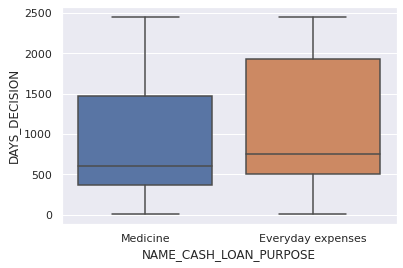

In [ ]:
''' Make a boxplot to visualize the amount of days to make a 
decision and filtered loan purposes difference (t-test) '''

sns.boxplot(y = df["DAYS_DECISION"],x=df_em["NAME_CASH_LOAN_PURPOSE"])

In [ ]:
# Calculate c.i lower and c.i higher range of days it takes to make a loan decision difference.
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0] #
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df_med['DAYS_DECISION'],df_everyday['DAYS_DECISION'])

'The difference in means at the 95% confidence interval (two-tail) is between 223.9962496008987 and 327.8894406465815.'

# Story

- Do banks make more money and save more times when people get a loan depending on the loan purposes? 
- Should the bank focus on making loan advertisements with `medical reasons` instead of `daily expenses`, ex: “We support a loan for your medical treatments with reasonable interest rate” to attract customers who are dealing with their medical pill.
- We are testing the amount of credits the bank loan people depends on the purposes and how long it takes to get this loan purpose approve to see which loan purpose makes more money and saves more time than the other. 


#Evaluate

The result of the 2 sample t-test:

- HYPOTHESIS 1: 

  - With the p-value at `2.34e-06` which is smaller than `0.05`, reject the null hypothesis which is rejecting the amount of credit of `everyday expenses` loan equal to the amount of credit of `medicine` loan.

  - At `95% confidence`, there is a statistically significant difference in average amount of credit between people who have loan of `everyday expenses` and `medicine` loan.

  - The average difference of amount of credits is between `$27,901.95` and `$67,232`

- HYPOTHESIS 2: 

  - With the p-value at `8.65e-25` which is smaller than `0.05`, reject the null hypothesis which is rejecting the amount of days to make a decision of `everyday expenses` loan equal to the amount of days to make a decision of `medicine` loan.

  - At `95% confidence`, there is a statistically significant difference in average the amount of days to make a decision between people who have loan of `everyday expenses` and `medicine` loan.

  - The average difference of amount of credits is between `224` and `328` days.

# Value
Provide value for your intended audience. Make sure to explain how your findings are valuable:


- After performing 2 t-tests, we got the average amount of credits of `medicine` loan is at `$26,6734.1` which is higher than `everyday expenses` loan is at `$21,9167.1`, and the average of days it takes to make a decision of `medicine` loan is at `862` days which is shorter than `everyday expenses` loan is at `1138` days.

- This translates to a possible fact that the bank makes more money from people who get a loan for `medicine` purpose than `everyday expenses` purpose. Moreover, the bank saves time on making a decision to approve a loan for `medicine` purpose than `everyday expenses` purpose. 

- Businesses such as banks will find this information valuable. They can target on making advertisement and promotion to get more people get a loan for medical treatment because it helps to make more money and save times.

- Recomendation: Because we make more money and save more time when people get a loan with `medicine` reason, we should focus on getting more people to apply for loan with this purpose by promoting or advertising it.
